# Лабораторная работа 4

Деревья решений

Выполнил: номер группы, фио (добавить в имя файла)

0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [201]:
# Таблица клиентов
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Описание данных

In [202]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

##### Пояснение для каждой колонки: 

ID: Customer's unique identifier   
Year_Birth: Customer's birth year   
Education: Customer's education level   
Marital_Status: Customer's marital status  
Income: Customer's yearly household income   
Kidhome: Number of children in customer's household   
Teenhome: Number of teenagers in customer's household    
Dt_Customer: Date of customer's enrollment with the company     
Recency: Number of days since customer's last purchase    
Complain: 1 if the customer complained in the last 2 years, 0 otherwise   

MntWines: Amount spent on wine in last 2 years   
MntFruits: Amount spent on fruits in last 2 years   
MntMeatProducts: Amount spent on meat in last 2 years   
MntFishProducts: Amount spent on fish in last 2 years    
MntSweetProducts: Amount spent on sweets in last 2 years   
MntGoldProds: Amount spent on gold in last 2 years   

NumDealsPurchases: Number of purchases made with a discount   
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise    
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise    
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise   
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise   
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise   
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise   

NumWebPurchases: Number of purchases made through the company’s website   
NumCatalogPurchases: Number of purchases made using a catalogue    
NumStorePurchases: Number of purchases made directly in stores   
NumWebVisitsMonth: Number of visits to company’s website in the last month    

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [203]:
#Убираем nan
mean_m=df['Income'].mean() 
df=df.fillna(value=mean_m)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [204]:
df=df.drop(["Dt_Customer"],axis=1)
df1=df.copy()
df2=df.copy()

In [205]:
# 1.0

In [206]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [207]:
# преобразовываем категориальные признаки в бинарные
df2=pd.get_dummies(df2,columns=['Education','Marital_Status'])

In [208]:
df2

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,1,0,0,0,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,0,0,0,1,0,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,1,0,0,0,0,0,0,1,0,0


In [168]:
# 1.1 

In [169]:
y1 = df2['Education_PhD'].astype('category')
y1 = y1.cat.codes
df2.pop('Education_PhD')

0       0
1       0
2       0
3       0
4       1
       ..
2235    0
2236    1
2237    0
2238    0
2239    1
Name: Education_PhD, Length: 2240, dtype: uint8

In [171]:
# Нормализуем значения признаков
scaler = StandardScaler()
scaler2 = scaler.fit_transform(df2)

In [134]:
# делим на обучающую и тестовую выборки
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(scaler2, y1, test_size=0.33, random_state=0)

In [136]:
# строим KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(Xtrain1, Ytrain1)
y_pred1 = model.predict(Xtest1)

In [137]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9351351351351351


In [138]:
# 1.2

In [210]:
# то же самое, но с использование pipeline
model2 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
model2.fit(Xtrain1,Ytrain1)
y_pred1 = model2.predict(Xtest1)

In [211]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9364864864864865


In [141]:
# 1.3

In [213]:
# производим подбор оптимальных гиперпараметров
parameters = {'n_neighbors': range(2, 30)}
model3 = GridSearchCV(KNeighborsClassifier(), parameters)
model3.fit(Xtrain1, Ytrain1)
model3.best_params_

{'n_neighbors': 5}

In [215]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(Xtrain1,Ytrain1)
y_pred1 = model3.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9351351351351351



2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности


In [216]:
# 2.1

model4 = DecisionTreeClassifier()
model4.fit(Xtrain1, Ytrain1)
y_pred1 = model4.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  1.0


In [144]:
# 2.2 

parameters = {'max_depth': range(2, 30),'max_features':('auto', 'sqrt', 'log2'),
             'splitter':('best', 'random')}
model5 = GridSearchCV(model4, parameters)
model5.fit(Xtrain1, Ytrain1)
y_pred1 = model5.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))
g=model5.best_params_
g

Accuracy:  0.8878378378378379


{'max_depth': 20, 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
# 2.3

def cm_to_inch(value):
    return value/2.54 

График


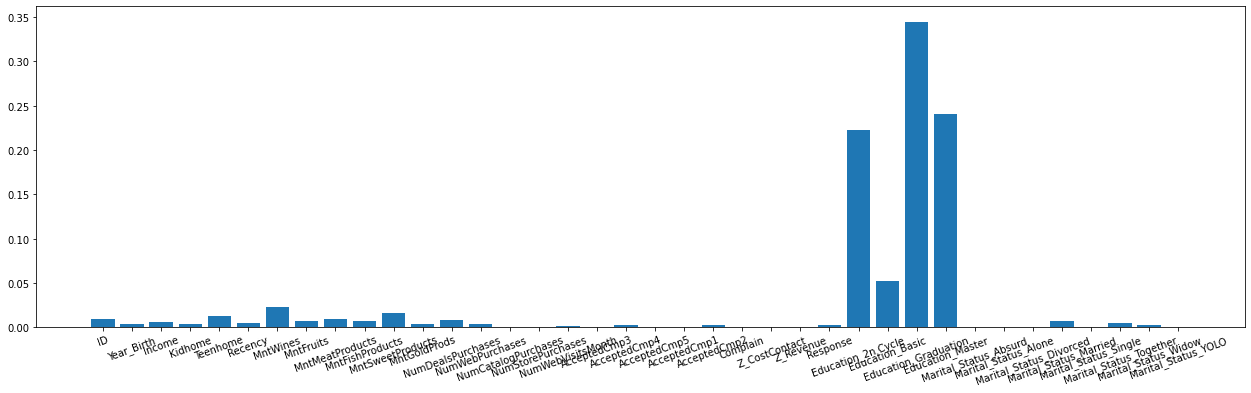

In [157]:
model4 = DecisionTreeClassifier(max_depth=12, max_features='sqrt', splitter='random')
model4.fit(Xtrain1, Ytrain1)
importances = model4.feature_importances_
plt.figure(figsize=(cm_to_inch(55),cm_to_inch(15)))
plt.bar(df2.columns, importances)
plt.xticks(rotation=20)
print("График")

In [174]:
# Ищем наиболее важные
im = np.vstack([importances, df2.columns])
s={}
for i in range(0,im.shape[1]):
    s[im[1,i]]=im[0,i]
s

{'ID': 0.009577599122143501,
 'Year_Birth': 0.0038757415929018364,
 'Income': 0.006232312889225564,
 'Kidhome': 0.004220598733037395,
 'Teenhome': 0.012170549198879768,
 'Recency': 0.005169632876382496,
 'MntWines': 0.022899404374699683,
 'MntFruits': 0.007054461757398962,
 'MntMeatProducts': 0.008915257148476305,
 'MntFishProducts': 0.007055470621136031,
 'MntSweetProducts': 0.01634965206376807,
 'MntGoldProds': 0.0036152709346033655,
 'NumDealsPurchases': 0.008121568171012493,
 'NumWebPurchases': 0.003187599718243751,
 'NumCatalogPurchases': 0.0,
 'NumStorePurchases': 0.0,
 'NumWebVisitsMonth': 0.0010203782200217742,
 'AcceptedCmp3': 0.0,
 'AcceptedCmp4': 0.00202289982119315,
 'AcceptedCmp5': 0.0,
 'AcceptedCmp1': 0.0,
 'AcceptedCmp2': 0.002384293479954655,
 'Complain': 0.0,
 'Z_CostContact': 0.0,
 'Z_Revenue': 0.0,
 'Response': 0.00270480409837262,
 'Education_2n Cycle': 0.22190372313878767,
 'Education_Basic': 0.05207233110478974,
 'Education_Graduation': 0.34473031824937833,
 'Edu

In [176]:
# Нашли
sorted(s,reverse=True,key=s.get)[0:3]

['Education_Graduation', 'Education_Master', 'Education_2n Cycle']

3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`

3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [187]:
# 3.1

In [190]:
model6 = RandomForestClassifier()
model6.fit(Xtrain1, Ytrain1)
y_pred1 = model.predict(Xtest1)

In [191]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9351351351351351


In [192]:
# 3.2

In [193]:
params = {
    "criterion": ("gini", "entropy"),
    "n_estimators": range(2, 30)
}
model7 = GridSearchCV(RandomForestClassifier(), params)
model7.fit(Xtrain1, Ytrain1)
print(model7.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=21)


In [194]:
y_pred1 = model7.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.9905405405405405


График


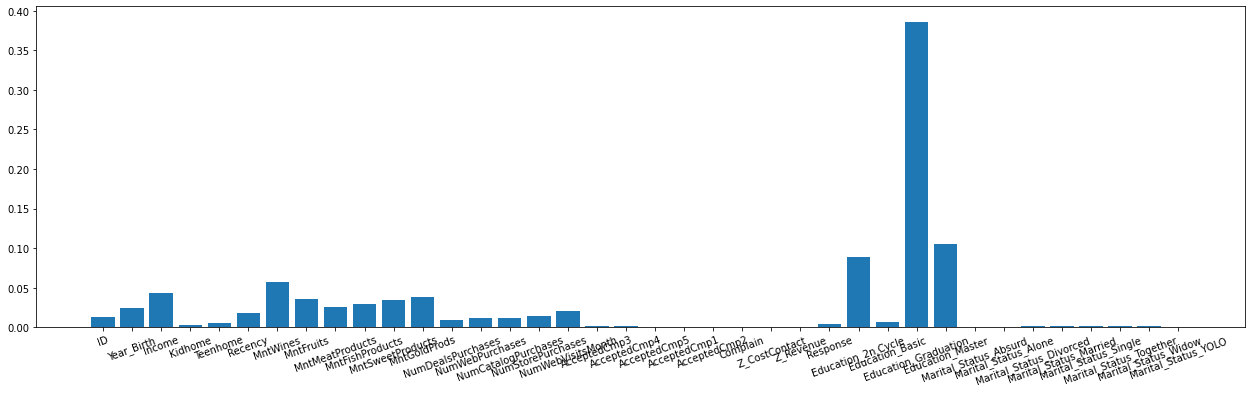

In [196]:
model8 = RandomForestClassifier(criterion='entropy', n_estimators=21)
model8.fit(Xtrain1, Ytrain1)
importances = model8.feature_importances_
plt.figure(figsize=(cm_to_inch(55),cm_to_inch(15)))
plt.bar(df2.columns, importances)
plt.xticks(rotation=20)
print("График")

#### 4
Выводы:

Наибольшую точность (Accuracy=1.0) продемонстрировал классификатор DecisionTreeClassifier() с параметрами по умолчанию

После него с совсем небольшим отставанием (Accuracy=0.9905) идет RandomForestClassifier() с параметрами criterion='entropy', n_estimators=21